<a href="https://colab.research.google.com/github/AYUSH-11/Machine-Learning/blob/main/Crop_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#All mathematical operation are done by numpy
import numpy as np
#It is used for ploting 
import matplotlib.pyplot as plt
# for read all files
import pandas as pd
import random
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [ ]:
from google.colab import drive  #to import Google drive data
drive.mount('/content/drive') #to the drive data into colab cloud and enter the activation colab 

Mounted at /content/drive


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Linear Regression"

/content/drive/My Drive/Colab Notebooks/Linear Regression


In [ ]:
dataset = pd.read_csv('Crop_recommendation.csv')

In [ ]:
dataset.shape

(2200, 8)

In [ ]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
unique_lst=[]
for i in dataset['label']:
    if i not in unique_lst:
        unique_lst.append(i)
dataset_numeric_label =dataset

for i in range(len(dataset_numeric_label)):
    for j in range(len(unique_lst)):
        if (dataset_numeric_label['label'][i] == unique_lst[j]):
            dataset_numeric_label['label'][i]=j;
            


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#Shuffle DataFrame rows
dataset =dataset.sample(frac=1)

In [ ]:
# split data into two parts training and testing 
train_set = dataset_numeric_label.sample(frac=0.80,random_state=0)
test_set = dataset_numeric_label.drop(train_set.index)

In [ ]:
print(train_set.shape)
print(test_set.shape)

(1760, 8)
(440, 8)


In [ ]:
for i in dataset_numeric_label['label']:
    if (i>22 or i <0):
        print(i)

In [ ]:
#bifurgate in feature and target
train_set_feature = train_set.iloc[:,0:7].values
train_set_target = train_set.iloc[:,-1].values
test_set_feature = test_set.iloc[:,0:7].values
test_set_target = test_set.iloc[:,-1].values
train_set_target=train_set_target.astype('int')
test_set_target=test_set_target.astype('int')

In [ ]:
# It will give precision,recall,f1-score,support for each class
#macro average : averaging the unweighted mean per label
#weighted average : averaging the support-weighted mean per label
def make_report(y_actual,y_pred):
    confusionMatrix=confusion_matrix(y_actual, y_pred, labels=[i for i in range(22)])
    report = classification_report(y_actual, y_pred)
    print(report)
    

# K -Nearest Neighbors

In [ ]:
#Find Eucledian Distance Between point-1 and point-2
def eucledian_distance(p1,p2):
    distance = (p1-p2)**2
    distance =np. sum(distance)
    return  math.sqrt(distance)

In [ ]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform')
model.fit(train_set_feature,train_set_target)
prediction = model.predict(test_set_feature)
print(model.score(test_set_feature, test_set_target) * 100)

99.0909090909091


In [ ]:
make_report(test_set_target,prediction)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        16
           5       1.00      0.95      0.97        20
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        19
           8       0.96      1.00      0.98        27
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        20
          17       1.00    

# Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=1000,random_state=0)
model.fit(train_set_feature,train_set_target)
prediction = model.predict(test_set_feature)

print(model.score(test_set_feature, test_set_target) * 100)

99.77272727272727


In [ ]:
make_report(test_set_target,prediction)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        27
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        20
          17       1.00    

# KMeans

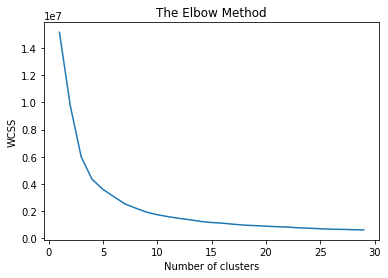

In [ ]:
wcss=[]
for i in range(1,30):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(train_set)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,30),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=22,init='k-means++',random_state=0)
y_kmeans=kmeans.fit(train_set_feature)
prediction = y_kmeans.predict(test_set_feature)

# Hierarchical Clustering

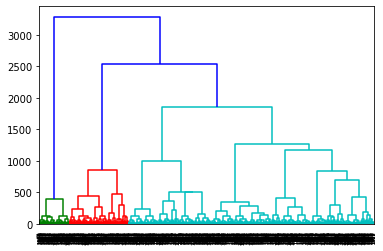

In [ ]:
dendogram = sch.dendrogram(sch.linkage(train_set_feature,method='ward'))

In [ ]:
hc = AgglomerativeClustering(n_clusters=22,affinity ='euclidean', linkage = 'ward')
y_hc = hc.fit(train_set_feature)
prediction = y_hc.fit_predict(test_set_feature)

# DBSCAN

In [ ]:
train_set_feature_standard = StandardScaler().fit_transform(train_set_feature)
test_set_feature_standard = StandardScaler().fit_transform(test_set_feature)

In [ ]:
nearesneighvour=NearestNeighbors(3).fit(train_set_feature_standard)

In [ ]:
distances,indices = nearesneighvour.kneighbors(train_set_feature_standard)

In [ ]:
distanceDec = sorted(distances[:,2],reverse=True)

[0.8018226955051077, 0.8006625084199841, 0.799757043227604, 0.7994687851877622, 0.7994687851877622]


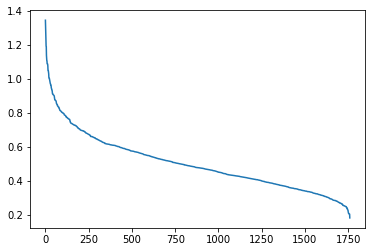

In [ ]:
plt.plot(indices[:,0],distanceDec)


In [ ]:
db = DBSCAN(eps=0.85,min_samples=5).fit(train_set_feature_standard)

In [ ]:
prediction = db.fit_predict(test_set_feature_standard)

In [ ]:
print(prediction)

[-1 -1 -1 -1 -1 -1 -1 11 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0  0  1 -1 12
 -1 -1  0  1  0  0  1  1 -1 -1  0 -1  1  0  2  2 -1  2  2 -1  2  2  2  2
  2 -1  2  2  2  2  2  2  3  3 -1  3  3  3  3  3 -1  3  3 -1  3  3 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4  4  4  4 -1  4  4 -1 -1 -1
 -1 -1 -1  4  4 -1 -1  4 -1  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4 -1  4  4  4  4  4  4  4  4  4  4  4 -1  4  4  4 -1
  4 -1  5  6  5  5  6 -1  6  6  5  5  5  6  5  6  5  6  5  5  6  5  5  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7 -1  8 -1  9 -1  8  9
 -1  9 -1  8 -1 -1  8  8  9  9  8  8  8 -1 10 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 -1 -1 -1 -1  5 -1 -1  5  5  6  6 -1 -1 -1 -1